# Análise Estatística dos Acidentes de Trânsito

## Projeto da disciplina **SSC0957 - Práticas em Ciência de Dados II**

- Alexandre Eduardo de Souza Jesus - alexandre_souza@usp.br - 12559506

- Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

- Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

<img src="pictures.gif" style="width: 200px;"/>

---


## 6. Análise Estatística dos Dados


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import silhouette_samples, silhouette_score

warnings.filterwarnings("ignore")

In [63]:
import pyAgrum as gum
import pyAgrum.lib.explain as explain
from sklearn.dummy import DummyClassifier
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn_vs_bn as bnvsbn
import pyAgrum.lib.image as gimg
import graphviz
from sklearn.model_selection import train_test_split

In [64]:
prf_rain_data = pd.read_csv("processed_data/prf_rain_data.csv", index_col=0)
prf_rain_data_tests = prf_rain_data[
    [
        "rain",
        "temperature_2m",
        "apparent_temperature",
        "relativehumidity_2m",
        "cloudcover",
        "windspeed_10m",
    ]
]

In [65]:
prf_not_rain_data = pd.read_csv("processed_data/prf_not_rain_data.csv", index_col=0)
prf_not_rain_data_tests = prf_not_rain_data[
    [
        "rain",
        "temperature_2m",
        "apparent_temperature",
        "relativehumidity_2m",
        "cloudcover",
        "windspeed_10m",
    ]
]

### 6.1. Testes de Hipótese


In [66]:
# testando normalidade das variáveis com o teste shapiro-wilk
# H0 (hipotese nula) - os dados seguem uma distribuição normal

alpha = 0.05

for column in prf_rain_data_tests.columns:
    statistic, p_value = stats.shapiro(prf_rain_data_tests[column])
    if p_value > alpha:
        print(f"{column}: os dados são normais")
    else:
        print(f"{column}: os dados não são normais")

rain: os dados não são normais
temperature_2m: os dados são normais
apparent_temperature: os dados não são normais
relativehumidity_2m: os dados não são normais
cloudcover: os dados não são normais
windspeed_10m: os dados não são normais


In [67]:
alpha = 0.05

for column in prf_not_rain_data_tests.columns:
    statistic, p_value = stats.shapiro(prf_not_rain_data_tests[column])
    if p_value > alpha:
        print(f"{column}: os dados são normais")
    else:
        print(f"{column}: os dados não são normais")

rain: os dados não são normais
temperature_2m: os dados não são normais
apparent_temperature: os dados não são normais
relativehumidity_2m: os dados não são normais
cloudcover: os dados não são normais
windspeed_10m: os dados não são normais


In [68]:
# como a normalidade foi rejeitada, utiliza-se o teste não-paramétrico de Mann-Whitney para verificar
# a diferença entre os grupos

alpha = 0.05

statistic, p_value = stats.mannwhitneyu(
    prf_rain_data_tests["rain"], prf_not_rain_data_tests["rain"]
)

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (1.2329597100927212e-132)


In [69]:
statistic, p_value = stats.mannwhitneyu(
    prf_rain_data_tests["temperature_2m"], prf_not_rain_data_tests["temperature_2m"]
)

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (7.172223211328207e-07)


In [70]:
statistic, p_value = stats.mannwhitneyu(
    prf_rain_data_tests["apparent_temperature"],
    prf_not_rain_data_tests["apparent_temperature"],
)

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

não há diferença significativa entre as variáveis (0.14641530295557445)


In [71]:
statistic, p_value = stats.mannwhitneyu(
    prf_rain_data_tests["relativehumidity_2m"],
    prf_not_rain_data_tests["relativehumidity_2m"],
)

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (1.2481311341241215e-56)


In [72]:
statistic, p_value = stats.mannwhitneyu(
    prf_rain_data_tests["cloudcover"], prf_not_rain_data_tests["cloudcover"]
)

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (3.963067035891679e-129)


In [73]:
statistic, p_value = stats.mannwhitneyu(
    prf_rain_data_tests["windspeed_10m"], prf_not_rain_data_tests["windspeed_10m"]
)

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (0.000606321895064651)


In [74]:
prf_rain_data_tests.describe()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,0.904934,21.723612,23.884846,84.630837,81.125110,8.910573
std,1.523465,4.237671,5.584589,12.947197,24.388504,5.102003
min,0.000000,9.100000,5.800000,35.000000,2.000000,0.000000
25%,0.100000,18.950000,20.400000,78.000000,66.000000,5.200000
50%,0.300000,21.900000,24.400000,88.000000,95.000000,7.900000
75%,1.100000,24.500000,27.700000,94.000000,100.000000,11.550000
max,18.300000,34.800000,39.000000,100.000000,100.000000,45.500000


In [75]:
prf_not_rain_data_tests.describe()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,0.192952,22.547137,24.015242,73.256388,45.554185,9.527489
std,0.687469,5.120949,6.489959,18.243512,34.270380,4.987270
min,0.000000,2.400000,-1.300000,17.000000,0.000000,0.400000
25%,0.000000,19.300000,19.800000,61.000000,15.000000,5.800000
50%,0.000000,22.900000,24.700000,76.000000,40.000000,8.600000
75%,0.100000,26.000000,28.800000,88.000000,75.000000,12.600000
max,9.000000,35.600000,39.900000,100.000000,100.000000,35.600000


### 6.2. Análise de Componentes Principais


In [76]:
prf_rain_data_pca = prf_rain_data[
    [
        "rain",
        "temperature_2m",
        "apparent_temperature",
        "relativehumidity_2m",
        "cloudcover",
        "windspeed_10m",
    ]
]
prf_rain_data_pca.head()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
6,0.2,21.2,24.3,88.0,100.0,1.4
29,0.4,21.5,21.9,80.0,80.0,17.0
72,0.1,22.7,26.2,91.0,29.0,6.9
175,4.1,27.9,30.5,63.0,100.0,9.4
183,1.1,23.2,26.9,89.0,100.0,6.2


<AxesSubplot:>

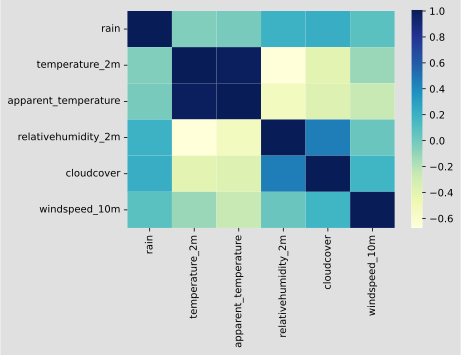

In [77]:
corr = prf_rain_data_pca.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

In [78]:
scaler = StandardScaler()

standardized_data = scaler.fit_transform(prf_rain_data_pca)
standardized_df = pd.DataFrame(standardized_data, columns=prf_rain_data_pca.columns)

standardized_df.head()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
0,-0.462921,-0.123616,0.074372,0.260338,0.774267,-1.472732
1,-0.331584,-0.052791,-0.355572,-0.357829,-0.046153,1.586238
2,-0.528590,0.230508,0.414744,0.492151,-2.138224,-0.394249
3,2.098161,1.458138,1.185059,-1.671433,0.774267,0.095971
4,0.128098,0.348550,0.540144,0.337609,0.774267,-0.531510


In [79]:
X = np.matrix(standardized_df)
S = np.cov(np.transpose(X))

In [80]:
X = np.asarray(X)

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

In [82]:
pca.fit(X)

PCA(n_components=6)

In [83]:
pca.explained_variance_ratio_

np.round(pca.explained_variance_ratio_, 2)

array([0.47, 0.18, 0.17, 0.11, 0.07, 0.  ])

In [84]:
pca.explained_variance_ratio_.cumsum()

array([0.4713384 , 0.65360032, 0.81940568, 0.92956875, 0.99973879,
       1.        ])

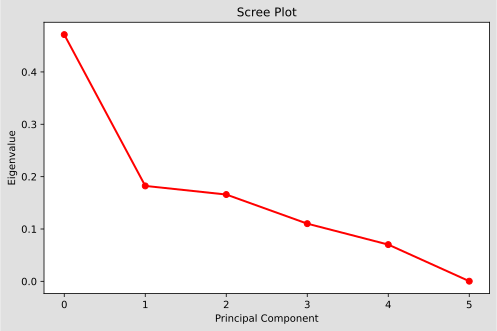

In [85]:
fig = plt.figure(figsize=(8, 5))

plt.plot(pca.explained_variance_ratio_, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")

plt.show()

In [86]:
pca.transform(X)

array([[-1.53990167e-01, -4.98670112e-01, -1.38629055e+00,
        -8.82688134e-01,  3.12418551e-01, -1.95735590e-02],
       [-2.47509013e-01, -1.16384697e-02,  1.67900531e+00,
         3.27506832e-02, -6.12125247e-02, -1.46683395e-02],
       [ 1.05151521e+00, -1.07280152e+00, -3.30039505e-01,
         1.31994697e+00, -1.16894092e+00,  2.15583352e-03],
       ...,
       [ 2.75809307e+00, -3.22836458e-01,  4.04303243e-01,
         5.37712378e-01, -5.78384291e-01,  8.91678727e-03],
       [ 5.11972283e-01,  2.61708437e-01,  1.04370407e+00,
        -5.64577126e-01, -7.99476916e-01, -1.36454116e-03],
       [-1.35015275e+00,  1.55537145e+00,  5.54709059e-01,
         2.48547389e-01, -7.78379848e-02, -1.55522761e-02]])

In [87]:
PCA1 = pca.transform(X)[:, 0]
PCA2 = pca.transform(X)[:, 1]
PCA3 = pca.transform(X)[:, 2]

In [88]:
prf_rain_data["PCA1"] = PCA1
prf_rain_data["PCA2"] = PCA2
prf_rain_data["PCA3"] = PCA3

In [89]:
prf_rain_data.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'rounded_datetime', 'rain', 'temperature_2m',
       'apparent_temperature', 'relativehumidity_2m', 'cloudcover',
       'windspeed_10m', 'is_day', 'PCA1', 'PCA2', 'PCA3'],
      dtype='object')

In [90]:
fig = px.scatter_3d(prf_rain_data, x="PCA1", y="PCA2", z="PCA3", color="fase_dia")
fig.show()

In [91]:
fig = px.scatter_3d(
    prf_rain_data, x="PCA1", y="PCA2", z="PCA3", color="classificacao_acidente"
)
fig.show()

In [92]:
fig = px.scatter_3d(
    prf_rain_data, x="PCA1", y="PCA2", z="PCA3", color="condicao_metereologica"
)
fig.show()

In [93]:
fig = px.scatter_3d(prf_rain_data, x="PCA1", y="PCA2", z="PCA3", color="tipo_pista")
fig.show()

In [94]:
fig = px.scatter_3d(prf_rain_data, x="PCA1", y="PCA2", z="PCA3", color="tipo_pista")
fig.show()

In [95]:
fig = px.scatter_3d(prf_rain_data, x="PCA1", y="PCA2", z="PCA3", color="dia_semana")
fig.show()

### 6.3. Análise de Agrupamento (Não-Hierárquico)


In [96]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

In [97]:
prf_rain_data.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'rounded_datetime', 'rain', 'temperature_2m',
       'apparent_temperature', 'relativehumidity_2m', 'cloudcover',
       'windspeed_10m', 'is_day', 'PCA1', 'PCA2', 'PCA3'],
      dtype='object')

In [98]:
df_clusters = prf_rain_data[
    [
        "dia_semana",
        "classificacao_acidente",
        "fase_dia",
        "sentido_via",
        "tipo_pista",
        "tracado_via",
        "uso_solo",
        "rain",
        "temperature_2m",
        "apparent_temperature",
        "relativehumidity_2m",
        "cloudcover",
        "windspeed_10m",
    ]
].copy()

In [99]:
df_clusters.head()

,dia_semana,classificacao_acidente,fase_dia,sentido_via,tipo_pista,tracado_via,uso_solo,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
6,sábado,Com Vítimas Feridas,Pleno dia,Crescente,Dupla,Desvio Temporário,Não,0.2,21.2,24.3,88.0,100.0,1.4
29,domingo,Com Vítimas Feridas,Pleno dia,Decrescente,Dupla,Reta,Sim,0.4,21.5,21.9,80.0,80.0,17.0
72,segunda-feira,Com Vítimas Feridas,Plena Noite,Crescente,Simples,Curva,Não,0.1,22.7,26.2,91.0,29.0,6.9
175,quinta-feira,Com Vítimas Feridas,Pleno dia,Decrescente,Simples,Reta,Não,4.1,27.9,30.5,63.0,100.0,9.4
183,quinta-feira,Com Vítimas Feridas,Pleno dia,Crescente,Dupla,Reta,Não,1.1,23.2,26.9,89.0,100.0,6.2


In [100]:
label_encoder = LabelEncoder()

df_clusters_label = df_clusters.copy()

df_clusters_label["dia_semana"] = label_encoder.fit_transform(df_clusters["dia_semana"])
df_clusters_label["classificacao_acidente"] = label_encoder.fit_transform(
    df_clusters["classificacao_acidente"]
)
df_clusters_label["fase_dia"] = label_encoder.fit_transform(df_clusters["fase_dia"])
df_clusters_label["sentido_via"] = label_encoder.fit_transform(
    df_clusters["sentido_via"]
)
df_clusters_label["tipo_pista"] = label_encoder.fit_transform(df_clusters["tipo_pista"])
df_clusters_label["tracado_via"] = label_encoder.fit_transform(
    df_clusters["tracado_via"]
)
df_clusters_label["uso_solo"] = label_encoder.fit_transform(df_clusters["uso_solo"])

df_clusters_label.head()

,dia_semana,classificacao_acidente,fase_dia,sentido_via,tipo_pista,tracado_via,uso_solo,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
6,5,1,3,0,0,1,0,0.2,21.2,24.3,88.0,100.0,1.4
29,0,1,3,1,0,5,1,0.4,21.5,21.9,80.0,80.0,17.0
72,3,1,2,0,2,0,0,0.1,22.7,26.2,91.0,29.0,6.9
175,2,1,3,1,2,5,0,4.1,27.9,30.5,63.0,100.0,9.4
183,2,1,3,0,0,5,0,1.1,23.2,26.9,89.0,100.0,6.2


In [101]:
df_clusters_scaled = df_clusters_label.copy()
df_clusters_scaled.iloc[:, :] = StandardScaler().fit_transform(df_clusters_scaled)

df_clusters_scaled.head()

,dia_semana,classificacao_acidente,fase_dia,sentido_via,tipo_pista,tracado_via,uso_solo,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
6,0.959882,-0.248606,0.715084,-0.898525,-0.951551,-0.777127,-0.527402,-0.462921,-0.123616,0.074372,0.260338,0.774267,-1.472732
29,-1.510563,-0.248606,0.715084,1.105062,-0.951551,0.940574,1.896086,-0.331584,-0.052791,-0.355572,-0.357829,-0.046153,1.586238
72,-0.028296,-0.248606,-0.485538,-0.898525,1.119418,-1.206553,-0.527402,-0.528590,0.230508,0.414744,0.492151,-2.138224,-0.394249
175,-0.522385,-0.248606,0.715084,1.105062,1.119418,0.940574,-0.527402,2.098161,1.458138,1.185059,-1.671433,0.774267,0.095971
183,-0.522385,-0.248606,0.715084,-0.898525,-0.951551,0.940574,-0.527402,0.128098,0.348550,0.540144,0.337609,0.774267,-0.531510


Text(0, 0.5, 'Inertia')

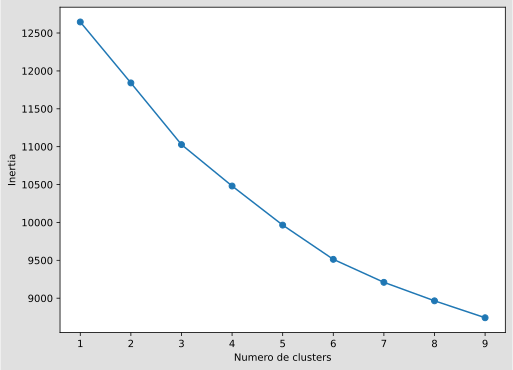

In [102]:
inertias = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clusters_scaled)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, "-o")
plt.xlabel("Numero de clusters")
plt.ylabel("Inertia")

Para otimizar o número de clusters e validar o resultado, foi utilizado o erro quadrático (a inércia). É uma medida que calcula a soma dos quadrados das distâncias entre cada ponto de dados e o centróide do cluster ao qual ele foi atribuído. O objetivo é minimizar este erro quadrático para encontrar clusters mais coesos, porém, como é natural que o erro diminua com o aumento do número de clusters, busca-se o ponto de equilíbrio no gráfico acima, para que também não haja um número exagerado de centróides.

Text(0, 0.5, 'Silhueta')

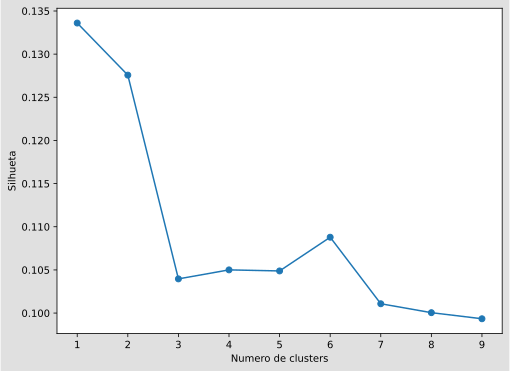

In [103]:
silhuetas = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clusters_scaled)
    silhuetas.append(np.mean(silhouette_samples(df_clusters_scaled, kmeans.labels_)))

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), silhuetas, "-o")
plt.xlabel("Numero de clusters")
plt.ylabel("Silhueta")

Já aqui, utiliza-se a silhueta como uma segunda forma de avaliação dos clusters. Esta métrica considera tanto a coesão dos pontos dentro de um mesmo cluster quanto a separação em relação aos outros clusters. Seu valor varia de -1 a 1 e pode ser interpretado da seguinte forma:

* **Próximo de +1**: indica que o ponto está bem dentro do seu próprio cluster e distante de outros clusters (bom agrupamento).

* **Próximo de 0**: O ponto está próximo da fronteira entre outros clusters.

* **Próximo de -1**: Indica que o ponto pode estar classificado no cluster errado.

Como neste caso estamos avaliando a silhueta média, busca-se então o cluster que fica mais próximo de 1, sendo eles 1, 2 e 6. Todavia, como visto no método anterior, desses selecionados o que melhor minimiza a inércia é o 6, logo ele é o melhor candidato para o nosso número adequado de clusters.

In [104]:
n_clusters = [1, 2, 6]

for x in n_clusters:
    kmeans = KMeans(n_clusters=x)
    df_clusters[f"cluster (k = {x})"] = kmeans.fit_predict(df_clusters_scaled)

In [105]:
df_clusters.head()

,dia_semana,classificacao_acidente,fase_dia,sentido_via,tipo_pista,tracado_via,uso_solo,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m,cluster (k = 1),cluster (k = 2),cluster (k = 6)
6,sábado,Com Vítimas Feridas,Pleno dia,Crescente,Dupla,Desvio Temporário,Não,0.2,21.2,24.3,88.0,100.0,1.4,0,1,1
29,domingo,Com Vítimas Feridas,Pleno dia,Decrescente,Dupla,Reta,Sim,0.4,21.5,21.9,80.0,80.0,17.0,0,1,3
72,segunda-feira,Com Vítimas Feridas,Plena Noite,Crescente,Simples,Curva,Não,0.1,22.7,26.2,91.0,29.0,6.9,0,0,0
175,quinta-feira,Com Vítimas Feridas,Pleno dia,Decrescente,Simples,Reta,Não,4.1,27.9,30.5,63.0,100.0,9.4,0,0,4
183,quinta-feira,Com Vítimas Feridas,Pleno dia,Crescente,Dupla,Reta,Não,1.1,23.2,26.9,89.0,100.0,6.2,0,1,1


<Figure size 576x360 with 0 Axes>

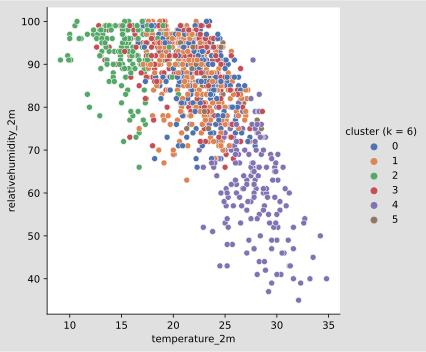

In [106]:
fig = plt.figure(figsize=(8, 5))

sns.relplot(
    x="temperature_2m",
    y="relativehumidity_2m",
    data=df_clusters,
    kind="scatter",
    hue="cluster (k = 6)",
    palette="deep",
)


# Display the plots
plt.show()

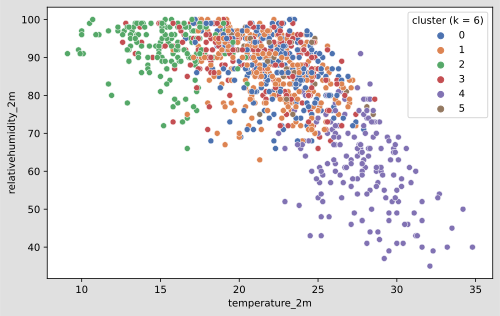

In [107]:
fig = plt.figure(figsize=(8, 5))

sns.scatterplot(
    x="temperature_2m",
    y="relativehumidity_2m",
    data=df_clusters,
    hue="cluster (k = 6)",
    palette="deep",
)

plt.show()

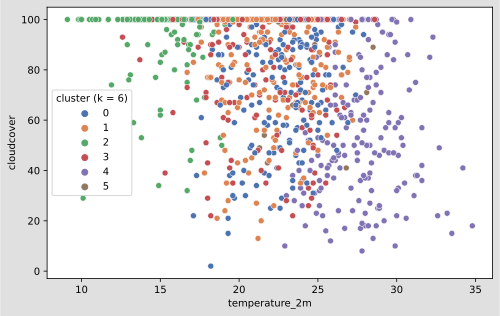

In [108]:
fig = plt.figure(figsize=(8, 5))

# Plotting each scatterplot on its respective subplot
sns.scatterplot(
    x="temperature_2m",
    y="cloudcover",
    data=df_clusters,
    hue="cluster (k = 6)",
    palette="deep",
)


plt.show()

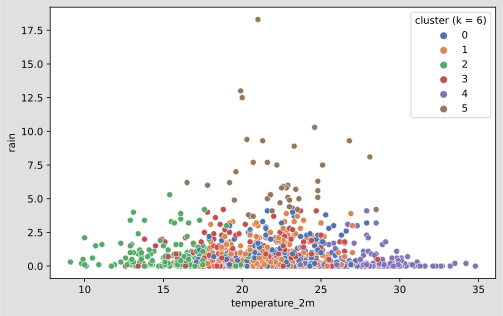

In [109]:
fig = plt.figure(figsize=(8, 5))

# Plotting each scatterplot on its respective subplot
sns.scatterplot(
    x="temperature_2m",
    y="rain",
    data=df_clusters,
    hue="cluster (k = 6)",
    palette="deep",
)

# Show the plots
plt.show()

In [110]:
df_clusters['cluster (k = 6)'] = df_clusters['cluster (k = 6)'].astype(str)

In [111]:
fig = px.scatter_3d(df_clusters, x="temperature_2m", y="rain", z="cloudcover", color="cluster (k = 6)")
fig.show()

In [112]:
fig = px.scatter_3d(df_clusters, x="temperature_2m", y="rain", z="relativehumidity_2m", color="cluster (k = 6)")
fig.show()

In [113]:
fig = px.scatter_3d(df_clusters, x="cloudcover", y="rain", z="relativehumidity_2m", color="cluster (k = 6)")
fig.show()

### 6.4 Redes Bayeseanas

In [115]:
# separando a base adequada pra a realização no modelo

rb_data = prf_not_rain_data.copy()
rb_data.drop(columns = ['id','data_inversa','horario','uf','br','km','municipio','veiculos','latitude','longitude','regional',
            'delegacia', 'uop', 'rounded_datetime','is_day','rain','temperature_2m','apparent_temperature', 'relativehumidity_2m',
            'cloudcover','windspeed_10m',], inplace = True)

rb_data_train, rb_data_test = train_test_split(rb_data, train_size = 0.8, random_state=42)

In [116]:
# gerando o template das redes

template = gum.BayesNet('Plus')

for i in list(rb_data.columns):
    if rb_data[i].dtypes == 'int64':
        template.add(gum.IntegerVariable(i, f"{i}", rb_data[i].unique().tolist()))
    else:
        template.add(gum.LabelizedVariable(i, f"{i}", rb_data[i].unique().tolist()))

(pyAgrum.BayesNet<double>@0x560c2841d740) BN{nodes: 17, arcs: 0, domainSize: 10^14.5761, dim: 163, mem: 1Ko 416o}

In [120]:
gimg.export(template,"template.pdf")

In [118]:
# rede obtida a partir dos dados de treino

learner = gum.BNLearner(rb_data_train, template)
bn3 = learner.learnBN()

In [119]:
gimg.export(bn3,"bn3.pdf")